In [1]:
import tensorflow as tf
import pickle

with open('/work/s6kalra/train_data', 'rb') as f: 
    train_data = pickle.load(f)
    train_label= pickle.load(f)

In [2]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()

['/gpu:0',
 '/gpu:1',
 '/gpu:2',
 '/gpu:3',
 '/gpu:4',
 '/gpu:5',
 '/gpu:6',
 '/gpu:7']

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
x_train.shape

In [4]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

K.set_image_data_format('channels_last')

Using TensorFlow backend.


In [5]:
batch_size = 128
num_classes = 100
epochs = 35

# input image dimensions
img_rows, img_cols = 32, 32


x_train = np.array([np.rot90(np.fliplr(img.reshape((3, 32, 32)).T)) for img in train_data])
x_train = x_train.astype('float32')
x_train = x_train/255

with open('/work/s6kalra/test_data', 'rb') as f: 
    test_data = pickle.load(f)

x_test = np.array([np.rot90(np.fliplr(img.reshape((3, 32, 32)).T)) for img in test_data])
x_test = x_test.astype('float32')
x_test = x_test/255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(train_label, num_classes)

x_train = 2.*(x_train - 0.5)
x_test = 2.*(x_test - 0.5)

x_train shape: (50000, 32, 32, 3)
50000 train samples


In [6]:
with open('/work/s6kalra/test', 'rb') as f: 
    test2_data = pickle.load(f, encoding='bytes')
orlabels = test2_data[b'fine_labels']

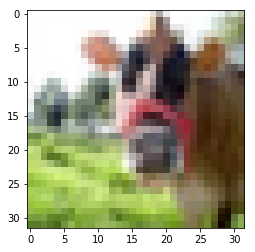

In [7]:
plt.imshow(0.5+(x_train[0]/2.))

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [5]:
def normalize(X_train, X_test):
    mean = np.mean(X_train,axis=(0,1,2,3))
    
    std = np.std(X_train, axis=(0, 1, 2, 3))
    print(mean)
    print(std)
    X_train = (X_train-mean)/(std+1e-7)
    X_test = (X_test-mean)/(std+1e-7)
    return X_train, X_test

x_train, x_test = normalize(x_train, x_test)

0.478179
0.268192


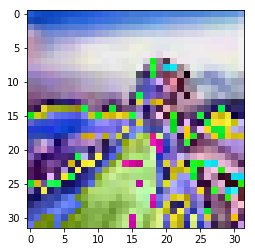

In [23]:
plt.imshow(x_test[0])

In [63]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense, BatchNormalization, Activation
from keras.models import Model, Sequential
from keras import regularizers
import numpy as np
from keras_tqdm import TQDMNotebookCallback


def build_model():
    # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

    model = Sequential()
    
    model.add(Conv2D(32, (3, 3),
                     padding='same',
                     input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('softmax'))
    
    return model

model = build_model()

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=1000,
          epochs=30,
          verbose=0, callbacks=[TQDMNotebookCallback()])

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [64]:
model.fit(x_train, y_train,
          batch_size=2000,
          epochs=10,
          verbose=0, callbacks=[TQDMNotebookCallback()])

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [26]:
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch=int(len(x_train) / 32), epochs=3, 
                    callbacks=[TQDMNotebookCallback()], verbose=0)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [16]:
for l in model_vgg16_conv.layers[0:14]:
    l.trainable = False

In [ ]:
y_train

In [ ]:
from sklearn.svm import SVC
cl = SVC(verbose=True)

cl.fit(features, train_label)

In [ ]:
features.shape

In [ ]:
model.summary()

In [ ]:
from keras_tqdm import TQDMNotebookCallback
my_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=0,
          callbacks=[TQDMNotebookCallback()])

In [62]:
x_test = np.array([np.rot90(np.fliplr(img.reshape((3, 32, 32)).T)) for img in test_data[b'data']])
x_test = x_test.astype('float32')
x_test = x_test/255

In [68]:
lpred = np.load('./predm.npy')
lpred2 = np.load('./predm2.npy')
lpred3 = np.load('./predm3.npy')
predictions = (lpred + lpred2 + lpred3 + model.predict(x_test))/4.

#csvf = pd.read_csv('/work/s6kalra/cnn_results.csv')
from sklearn.metrics import accuracy_score

accuracy_score(orlabels, np.argmax(predictions, axis=1))

0.56159999999999999

In [69]:
np.save('predm4', model.predict(x_test))

In [70]:
import pandas as pd
preds = pd.DataFrame(np.argmax(predictions, axis=1))

In [71]:
preds.index.name = 'ids'
preds.columns = ['labels']
preds.to_csv('cnn_results.csv', index=True)

In [31]:
model.save('trained_with_aug')

In [72]:
! cp cnn_results.csv /work/s6kalra/